# Evuation des différents retrievers

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd 
from harvai.bm25 import Bm25
from harvai.nn_model import Nn_model
from harvai.dpr import DPR
from harvai.embedding import Embedding
from harvai.utils import score
import seaborn as sns
import matplotlib.pyplot as plt

INFO - haystack.document_stores.base -  Numba not found, replacing njit() with no-op implementation. Enable it with 'pip install numba'.
INFO - haystack.modeling.model.optimization -  apex not found, won't use it. See https://nvidia.github.io/apex/
ERROR - root -  Failed to import 'magic' (from 'python-magic' and 'python-magic-bin' on Windows). FileTypeClassifier will not perform mimetype detection on extensionless files. Please make sure the necessary OS libraries are installed if you need this functionality.
WARNING - haystack -  Object '__file__' is imported through a deprecated path. Please check out the docs for the new import path.
WARNING - haystack -  Object '__file__' is imported through a deprecated path. Please check out the docs for the new import path.
WARNING - haystack -  Object '__file__' is imported through a deprecated path. Please check out the docs for the new import path.
WARNING - haystack -  Object '__file__' is imported through a deprecated path. Please check ou

# Evaluating BM25 with different number of articles

100%|██████████| 51/51 [00:00<00:00, 76.97it/s]


<AxesSubplot:>

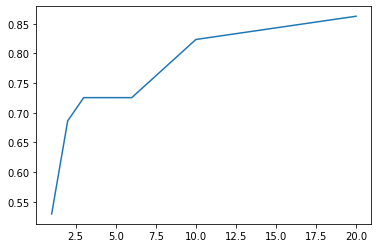

In [3]:
n_articles = [1,2,3,4,6,10,20]

scoring_bm25 = []

for n in n_articles: 
    
    model = Bm25(n)
    model.clean_data()
    model.fit()
    model.article_number = n
    scoring_bm25.append(score(model)['recall'])
    
sns.lineplot(x=n_articles, y=scoring_bm25)

# Evaluating KNN with different number of articles

100%|██████████| 51/51 [00:00<00:00, 309.08it/s]


<AxesSubplot:>

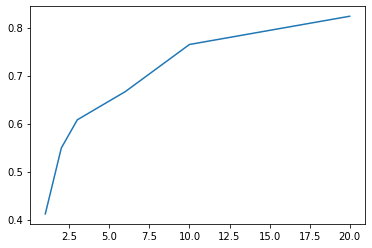

In [4]:
n_articles = [1,2,3,4,6,10,20]

scoring_knn = []

for n in n_articles: 
    
    model = Nn_model(n)
    model.clean_data()
    model.fit()
    model.article_number = n
    scoring_knn.append(score(model)['recall'])
    
sns.lineplot(x=n_articles, y=scoring_knn)

# Evaluating DPR with different number of articles

INFO - haystack.modeling.utils -  Using devices: CPU
INFO - haystack.modeling.utils -  Number of GPUs: 0
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'CamembertTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
INFO - haystack.modeling.model.language_model -  LOADING MODEL
INFO - haystack.modeling.model.language_model -  =============
INFO - haystack.modeling.model.language_model -  Model found locally at ../raw_data/retriever.pt/query_encoder
WARNING - haystack.modeling.model.language_model -  Using a model of type 'camembert' which might be incompatible with DPR encoders.Bert based encoders are supported that need input_ids,token_type_ids,attention_mask as input tensors.
INFO - haystack.modeling.model.language_model -  Loaded ../raw_data/retriever.pt/query_encoder
The tokenizer class

<AxesSubplot:>

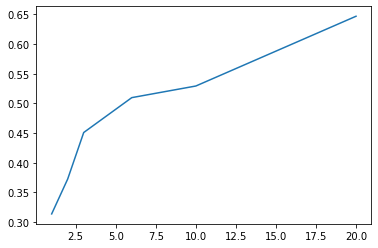

In [5]:
n_articles = [1,2,3,4,6,10,20]

scoring_dpr = []

for n in n_articles: 
    
    model = DPR(n)
    model.clean_data()
    model.fit()
    model.article_number = n
    scoring_dpr.append(score(model)['recall'])
    
sns.lineplot(x=n_articles, y=scoring_dpr)

# Evaluating Embedding with different number of articles

100%|██████████| 51/51 [00:05<00:00,  9.44it/s]


<AxesSubplot:>

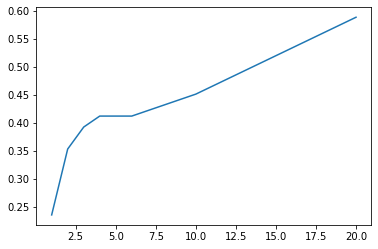

In [6]:
n_articles = [1,2,3,4,6,10,20]

scoring_embedding = []

for n in n_articles: 
    
    model = Embedding(n)
    model.clean_data()
    model.fit()
    model.article_number = n
    scoring_embedding.append(score(model)['recall'])
    
sns.lineplot(x=n_articles, y=scoring_embedding)

In [56]:
n_articles

[1, 2, 3, 4, 6, 10, 20]

In [7]:
score_retrievers = pd.DataFrame({'bm25':scoring_bm25,'knn':scoring_knn,'dpr':scoring_dpr,'embedding':scoring_embedding,'n_articles':n_articles})
score_retrievers.set_index('n_articles',inplace=True)

<AxesSubplot:xlabel='n_articles'>

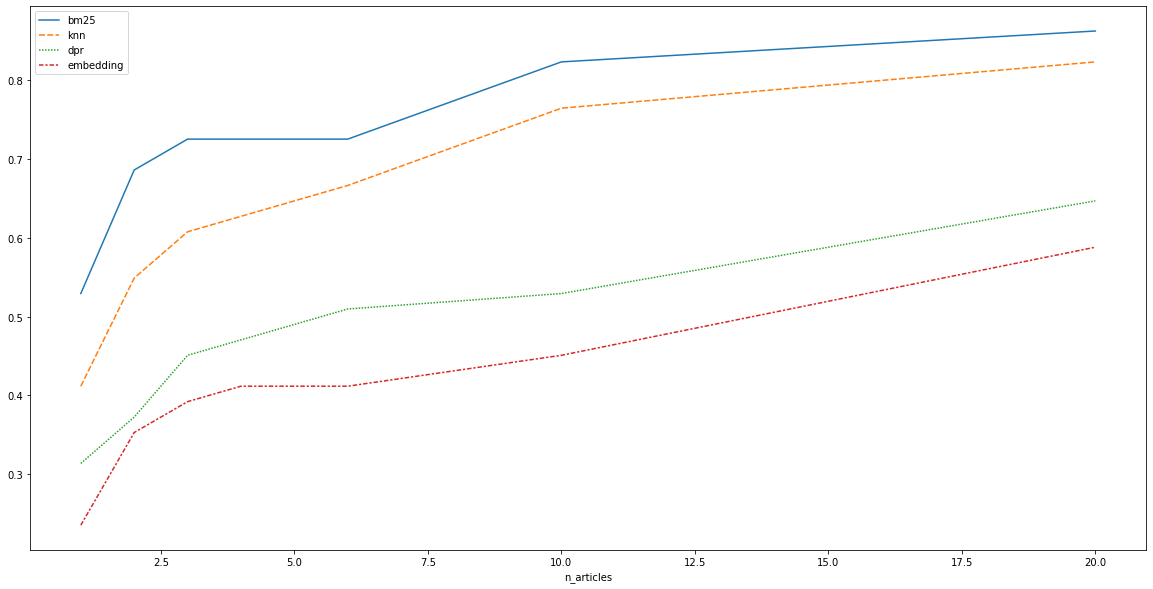

In [8]:
fig, ax1 = plt.subplots(1,1,figsize=(20,10))

sns.lineplot(ax=ax1,data=score_retrievers)

## Evaluating precision

In [124]:

model = Nn_model(5)
model.clean_data()
model.fit()
score(model,10)

454it [00:00, 475.73it/s]                         


{'recall': 0.788546255506608, 'average rank': 1.6089385474860336}

In [125]:

model = Bm25(5)
model.clean_data()
model.fit()
score(model,10)

454it [00:01, 255.88it/s]                         


{'recall': 0.8700440528634361, 'average rank': 1.5645569620253164}

In [126]:

model = DPR(5)
model.clean_data()
model.fit()
score(model,10)

INFO - haystack.modeling.utils -  Using devices: CPU
INFO - haystack.modeling.utils -  Number of GPUs: 0
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'CamembertTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
INFO - haystack.modeling.model.language_model -  LOADING MODEL
INFO - haystack.modeling.model.language_model -  =============
INFO - haystack.modeling.model.language_model -  Model found locally at ../raw_data/retriever.pt/query_encoder
WARNING - haystack.modeling.model.language_model -  Using a model of type 'camembert' which might be incompatible with DPR encoders.Bert based encoders are supported that need input_ids,token_type_ids,attention_mask as input tensors.
INFO - haystack.modeling.model.language_model -  Loaded ../raw_data/retriever.pt/query_encoder
The tokenizer class

{'recall': 0.5044052863436124, 'average rank': 1.8733624454148472}

In [127]:

model = Embedding(5)
model.clean_data()
model.fit()
score(model,10)

454it [00:42, 10.59it/s]                         


{'recall': 0.4955947136563877, 'average rank': 1.968888888888889}